# **Part I : Exploratory data analysis**

# **About Dataset**

We are working with the city-cycle fuel consumption dataset, which consists of data related to city-cycle fuel consumption in miles per gallon. The dataset includes 398 instances, and there are 8 attributes, including 3 multi-valued discrete and 5 continuous attributes. The goal is to predict the attribute "mpg" using regression.

It's worth noting that the dataset contains missing values, and 8 instances were removed due to unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". The attribute information shows that one of the attributes is a string type and is unique for each instance, which is the car name attribute.

This is a multivariate dataset with both categorical and real attribute characteristics, and it's associated with a regression task.

**Source**:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


**Data Set Information:**

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


**Attribute Information**:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

**Data Set Characteristics:**

Multivariate

**Number of Instances:**

398


**Attribute Characteristics:**

Categorical, Real

**Number of Attributes:**

8


**Associated Tasks:**

Regression


**Missing Values?**

Yes

In [ ]:
import os
import pathlib
import random
import time

import cv2
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

from glob import glob
from tqdm import tqdm_notebook, tnrange
from skimage.color import rgb2gray
from skimage.morphology import label
from skimage.transform import resize
from skimage.io import imread, imshow, concatenate_images
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, auc, f1_score, precision_score, recall_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


**Exploratory Data Analysis**

we extract meaning/information from data using plots and report important insights about data.

Preprocess the data, this includes dealing with missing values, duplicate data if any and then align the data.
EDA on categorical attributes, this includes analysing their distributions and relations with other cat. attributes.

EDA on numerical attributes, this includes analysing their distributions and relations with other num. attributes.

Then we will analyse the relation b/w num. & cat. attributes.
I make use of seaborn heavily throughout the notebook, so it is also a good goto notebook for those who are looking for EDA using seaborn.

In [ ]:
df = pd.read_csv('city-cycle fuel consumption dataset.csv')
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


The 'mpg', 'cylinders', 'displacement', 'weight', 'acceleration', and 'model_year' columns are of numeric data type, with 'mpg', 'displacement', 'horsepower', and 'weight' being continuous variables. The 'origin' column is detected as an object type, which suggests that it may contain string or categorical data. The 'name' column is also detected as an object type, which indicates that it contains string values.

It's worth noting that there are missing values in the 'horsepower' column, as indicated by the difference in non-null count between that column (392) and the other columns (398).

1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous
5. weight:        continuous
6. acceleration:  continuous
7. model year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car name:      string (unique for each instance)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [ ]:
df.shape

(398, 9)

We create separate lists for categorical and numerical column names because the analysis for these two types of columns is different.

To determine whether a column is categorical or numerical, we inspect the data type of each column. If a column's data type is 'object', it is considered categorical, while any other data type is considered numerical.

In [ ]:
import pandas as pd


cats = df.select_dtypes(include=['object']).columns.tolist()
nums = df.select_dtypes(exclude=['object']).columns.tolist()

print('Categorical variables:  ', cats)
print('Numerical variables:  ', nums)


Categorical variables:   ['origin', 'name']
Numerical variables:   ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [ ]:
df.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Given the limited number of unique values for 'cylinders' and 'model_year', it is reasonable to treat them as categorical variables rather than numerical ones.

In [ ]:
cats = df.select_dtypes(include=['object']).columns.tolist()
nums = df.select_dtypes(exclude=['object']).columns.tolist()

# Update categorical and numerical variables lists
cats += ['cylinders', 'model_year']
nums.remove('cylinders')
nums.remove('model_year')

# Print updated lists
print('Categorical variables: ', cats)
print('Numerical variables: ', nums)


Categorical variables:  ['origin', 'name', 'cylinders', 'model_year']
Numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


**inspect for nans in data.**

In [ ]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
#  proportion of nan rows in data
nan_proportion = 6 / len(df)
nan_proportion

0.01507537688442211

In [ ]:
print('Proportion of NaN values in data: {:.2%}'.format(nan_proportion))

Proportion of NaN values in data: 1.51%



The 'horsepower' column contains only six missing values, which represent approximately 1.5% of the data. Given that this proportion is relatively small, it is reasonable to remove these rows with missing values at this point.

In [ ]:
# create a new DataFrame that excludes rows with missing values in any column
df = df.dropna()

# reset the index of the DataFrame
df = df.reset_index(drop=True)

# print the shape of the resulting DataFrame
print(f'The resulting DataFrame has shape: {df.shape}')


The resulting DataFrame has shape: (392, 9)


In [ ]:
# count the number of duplicate rows in the DataFrame
num_duplicates = sum(df.duplicated())

# remove duplicate rows if any exist
if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f'Removed {num_duplicates} duplicate rows.')
else:
    print('No duplicate rows found.')


No duplicate rows found.


"Before we proceed, let's group all variables together based on their data type."

In [ ]:
df = pd.concat((df[cats], df[nums]), axis=1)
df.head(1)

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0


In [ ]:
# retrieve the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# save the  DataFrame to a CSV file
df.to_csv('fuel.csv', index=False)

# print a message indicating the number of rows and columns saved to the CSV file
print(f'Saved {num_rows} rows and {num_cols} columns to "fuel.csv".')


Saved 392 rows and 9 columns to "fuel.csv".


# **Section 1: Categorical Variables Analysis**


In [ ]:
# read the DataFrame from the CSV file
df = pd.read_csv('fuel.csv')


# print the list of categorical variable names
print('Categorical variables: ', cats)


Categorical variables:  ['origin', 'name', 'cylinders', 'model_year']


Initially, we will extract the categorical columns from the original DataFrame and conduct the analysis on this subset of data without modifying the original DataFrame.

After analyzing the categorical data, we will incorporate any necessary changes into the original DataFrame.

In [ ]:
# extract the categorical columns from the DataFrame
df_cat = df[['origin', 'name', 'cylinders', 'model_year']].copy()


# print the first few rows of the resulting DataFrame
df_cat.head()


,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


Since the 'origin' and 'name' columns contain text data, they require preprocessing. Specifically, we need to remove any extra spaces from the strings, as treating the same string with different spacings as different categories would be inappropriate.

In [ ]:
# remove extra spaces if any
for col in ['origin', 'name']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

df_cat.head(1)

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70


feature-engineering

We will create a categorical attribute named 'mpg_level', which divides the 'mpg' variable into low, medium, and high categories. This is beneficial for two reasons. Firstly, it simplifies exploratory data analysis, as we can categorize plots based on 'mpg'. Secondly, this is easier to understand than numerical values for 'mpg'.

We are categorizing the 'mpg' variable into three regions based on the following criteria:

'low' for values less than the minimum up to 17 (exclusive) 'medium' for values between 17 (inclusive) and 29 (exclusive) 'high' for values greater than or equal to 29.

In [ ]:
# define the ranges for each category of 'mpg'
low_range = (df['mpg'].min(), 17)
medium_range = (17, 29)
high_range = (29, df['mpg'].max() + 1)

# create a new column 'mpg_level' with categorical values based on the ranges
df_cat['mpg_level'] = pd.cut(df['mpg'], [low_range[0], low_range[1], medium_range[1], high_range[1]], labels=['low', 'medium', 'high'])

# add the 'mpg_level' column to the list of categorical variables
cats.append('mpg_level')

# print the list of categorical variables
print(f'Categorical variables: {cats}')


Categorical variables: ['origin', 'name', 'cylinders', 'model_year', 'mpg_level']


In [ ]:
# Obtain unique categories in 'origin'
print('Unique categories in "origin":')
print(df['origin'].unique())

# Obtain unique categories in 'cylinders'
print('Unique categories in "cylinders":')
print(df['cylinders'].unique())

# Obtain unique categories in 'model_year'
print('Unique categories in "model_year":')
print(df['model_year'].unique())


Unique categories in "origin":
['usa' 'japan' 'europe']
Unique categories in "cylinders":
[8 4 6 3 5]
Unique categories in "model_year":
[70 71 72 73 74 75 76 77 78 79 80 81 82]


In [ ]:
df_cat.head(1)

,origin,name,cylinders,model_year,mpg_level
0,usa,chevrolet chevelle malibu,8,70,medium


# **1.1 Distribution of categorical feature**

"Now let's analyze the distribution of each categorical feature and gain insights from the plots."

In [ ]:
df_cat.columns

Index(['origin', 'name', 'cylinders', 'model_year', 'mpg_level'], dtype='object')

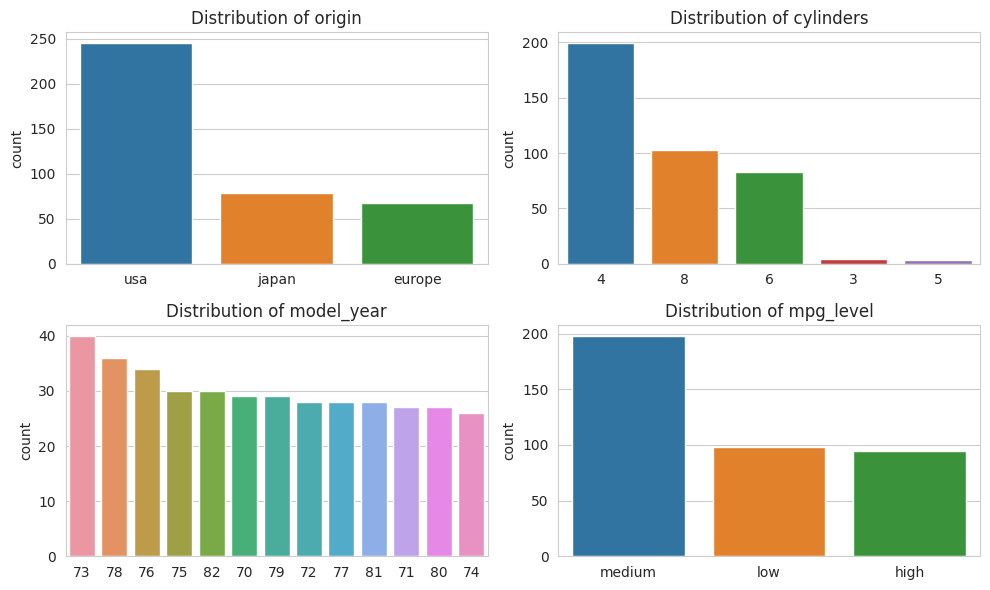

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=cat, data=df_cat, order=df_cat[cat].value_counts().index, ax=axs[row, col])
    axs[row, col].set_xlabel(None)
    axs[row, col].set_title(f'Distribution of {cat}')

plt.tight_layout()
plt.show()


This will print the proportion of the dominant class in each categorical feature, rounded to 2 decimal places.

With the exception of model_year, all categorical attributes are highly imbalanced and far from having a uniform distribution. In most cases, the majority of the data is concentrated in the top few categories.

While the distribution of model_year is not perfectly uniform, it can be considered a uniform-like distribution. This assumption is justifiable for two reasons. Firstly, we can observe from the plot that the distribution appears to be uniform-like. Secondly, it is important to note that this dataset represents a sample of the population, and the distribution of model_year may converge to a more uniform distribution in the true population as predicted by the Law of Large Numbers.

In [ ]:
for col in df_cat.columns:
    counts = df_cat[col].value_counts()
    dominant_class = counts.index[0]
    proportion = counts[dominant_class] / len(df_cat)
    print(f"Proportion of {dominant_class} in {col}: {proportion:.2f}")


Proportion of usa in origin: 0.62
Proportion of amc matador in name: 0.01
Proportion of 4 in cylinders: 0.51
Proportion of 73 in model_year: 0.10
Proportion of medium in mpg_level: 0.51


In [ ]:
df_cat.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

1. "The distribution of data across model_year is relatively balanced.

2. The distribution of mpg_level is highly imbalanced, with the majority of data falling under the "medium" category, accounting for 52.3% of the data. The "low" and "high" categories have a similar proportion of data. This imbalanced distribution is a result of the thresholding used to create this categorical variable. The medium range was broader, and hence more data points fell under this category. This imbalance would not be present in the original mpg feature since it is continuous.

3. The "origin" category in the dataset appears to be highly imbalanced, with 62.5% of the data coming from the USA alone, while Japan and Europe have a similar proportion. This dominance of the USA in the dataset may have implications for our future analysis, and we will investigate the reasons for this further.

4. The distribution of the "cylinders" variable is highly imbalanced, with the 4-cylinder category alone accounting for more than half (50.77%) of the data. The 8-cylinder and 6-cylinder categories are nearly in the same proportion, while the 3-cylinder and 5-cylinder categories together account for only 7 entries, which is only 1.8% of the entire data. This large proportional imbalance in the "cylinders" variable will be taken into consideration in our future analysis.

# **1.2 Analysis of 'model_year' attribute(categorical)**

Throughout the years, there is a significant decrease in the proportion of vehicles with more cylinders (8 & 6), while there is an increase in the proportion of vehicles with less cylinders. It is noteworthy that vehicles with 4 cylinders have a substantial proportion throughout the years, and in fact, in the 80's, most of the vehicles had 4 cylinders.

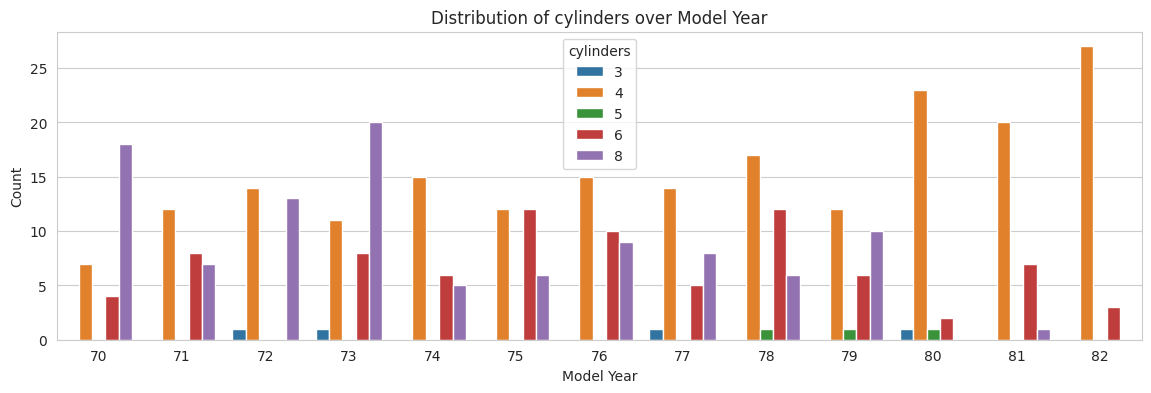

In [ ]:
# Set the figure size and style
plt.figure(figsize=(14, 4))
sns.set_style("whitegrid")

# Create the countplot
sns.countplot(x='model_year', hue='cylinders', data=df_cat)

# Set the title and axis labels
plt.title("Distribution of cylinders over Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")

# Show the plot
plt.show()


In below, the dominance in vehicle manufacturing by the USA in the early years gradually decreased as the years progressed. Japan and Europe emerged as strong competitors, with both manufacturing more vehicles than the USA in the year 1980. This sudden decrease in the USA's manufacturing may have been caused by some factors that need further analysis. Moreover, Europe initially produced more vehicles than Japan, but Japan surpassed it after 1976.

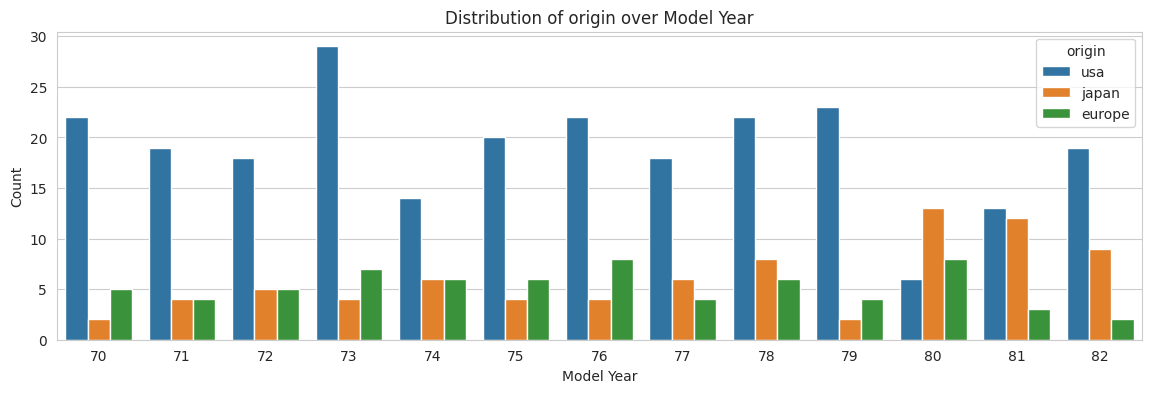

In [ ]:
# Set the figure size and style
plt.figure(figsize=(14, 4))
sns.set_style("whitegrid")

# Create the countplot
sns.countplot(x='model_year', hue='origin', data=df_cat)

# Set the title and axis labels
plt.title("Distribution of origin over Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")

# Show the plot
plt.show()


From the below plot, it can be observed that as the year progresses, there is a noticeable decrease in the manufacturing of cars with low mpg, which eventually stopped after 1979. On the other hand, the manufacturing of high mpg cars increases with each year, and post-1979, it was 1.5-2 times more than that of vehicles with medium mpg. Interestingly, the manufacturing of cars with medium mpg remains relatively constant throughout the years, and from 1974 to 1979, their production exceeded the sum of the remaining two categories.

The below plot also reveals an upward linear trend, indicating that the mpg of cars tends to increase as the year progresses.

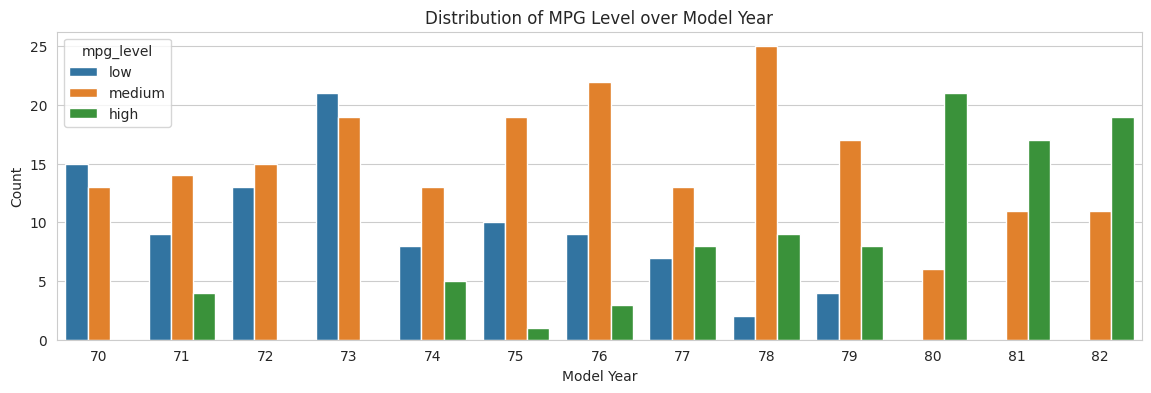

In [ ]:
# Set the figure size and style
plt.figure(figsize=(14, 4))
sns.set_style("whitegrid")

# Create the countplot
sns.countplot(x='model_year', hue='mpg_level', data=df_cat)

# Set the title and axis labels
plt.title("Distribution of MPG Level over Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")

# Show the plot
plt.show()


<Axes: xlabel='model_year', ylabel='mpg'>

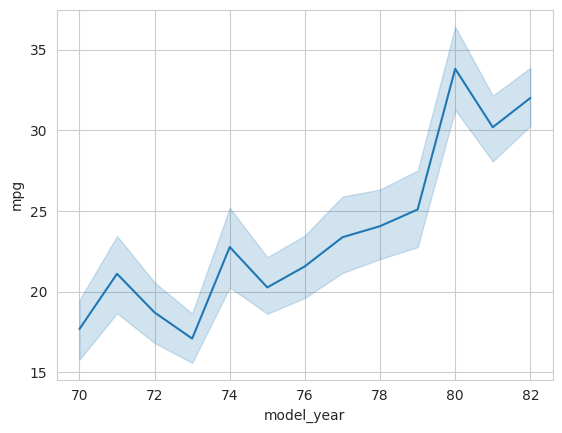

In [ ]:
sns.lineplot(x='model_year', y='mpg', data=df)


These results are logical since with the progress of time, technology improves, and vehicles with low mpg and more cylinders become less desirable while vehicles with high mpg and fewer cylinders become more popular.



# **1.3 Analysis of 'car_company' attribute (categorical)**

One observation to note is that each car name starts with the name of its manufacturer. Therefore, it is possible that the dataset contains a limited number of car manufacturers, and extracting them as a separate feature could provide valuable insights.

To accomplish this, we will create a new attribute named car_company by extracting the first word from each car name. Additionally, we will remove the car company name from the car_name column since it is no longer necessary. Finally, we will rename the column to 'car_name'.

In [ ]:
print(f'Total number of unique car models in `name`: {df_cat["name"].nunique()}')


Total number of unique car models in `name`: 301


In [ ]:
#extract car company from name
df_cat['car_company'] = df_cat['name'].str.split().str[0]

#remove car company from name and rename to car_name
df_cat['car_name'] = df_cat['name'].str.split().str[1:].apply(lambda x: ' '.join(x))
df_cat = df_cat.drop('name', axis=1)
df_cat = df_cat.rename(columns={'car_name': 'model'})

cats = list(df_cat.columns)
print(f'Categorical variables: {cats}')
df_cat.head()

Categorical variables: ['origin', 'cylinders', 'model_year', 'mpg_level', 'car_company', 'model']


,origin,cylinders,model_year,mpg_level,car_company,model
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,low,ford,torino


In [ ]:
# check the total number and unique values of car companies
num_car_companies = df_cat['car_company'].nunique()
unique_car_companies = df_cat['car_company'].unique()

print(f'Total number of unique car companies: {num_car_companies}\n')
print(f'Unique car companies:\n{unique_car_companies}')


Total number of unique car companies: 37

Unique car companies:
['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


**Distribution of 'car_company' Analysis**

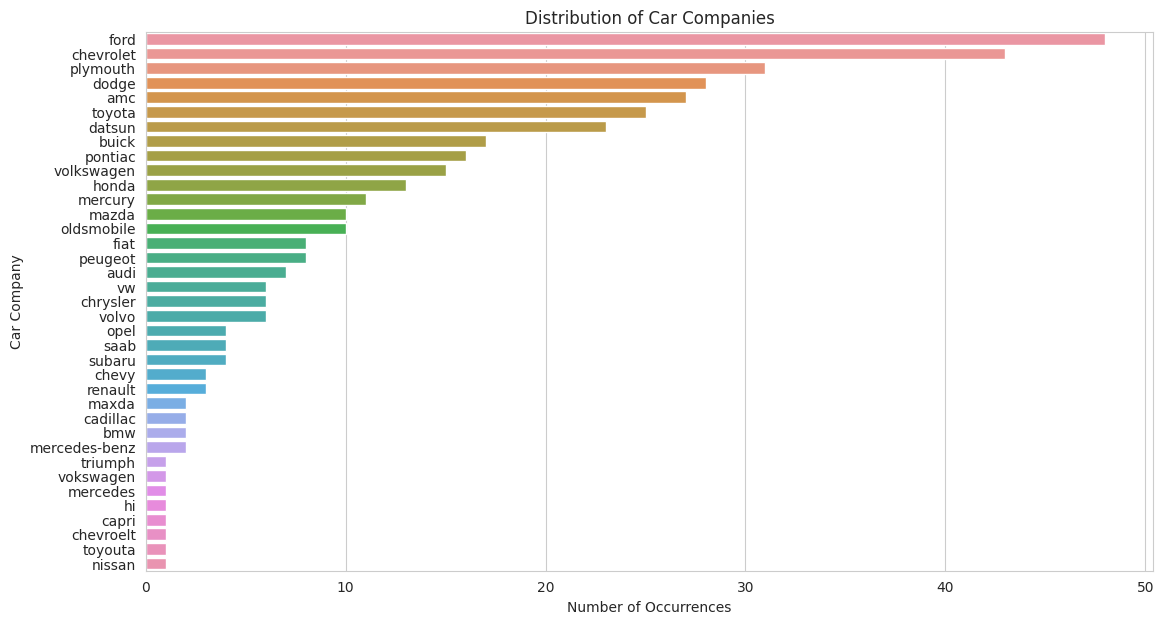

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(y='car_company', data=df_cat, order=df_cat['car_company'].value_counts().index)
plt.title('Distribution of Car Companies')
plt.xlabel('Number of Occurrences')
plt.ylabel('Car Company')
plt.show()


In [ ]:
df_cat.car_company.value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
opel              4
saab              4
subaru            4
chevy             3
renault           3
maxda             2
cadillac          2
bmw               2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: car_company, dtype: int64

1. We have created a new attribute named car_company by extracting the company names from the car names. Interestingly, we found that the number of unique car companies is significantly lower than the number of unique car names (about 8 times less).

2. Upon analyzing the car_name "model" feature, we noticed that it has a very large number of categories, almost equal to the total number of data points. Hence, it may not be very useful to conduct further analysis on this feature. Additionally, in most cases, car names do not have any significant correlations with other features, and therefore, it may be safe to exclude this feature from our analysis.

3. Upon analyzing the distribution of car_company, we discovered that it is highly skewed, and the majority of the data is dominated by the top 15 car companies. Notably, two car companies, Ford and Chevrolet, alone account for almost a quarter of the data with a combined proportion of around 23%.

**car_company Analysis**

Due to the large number of categories in the car_company attribute and the low proportion of many of them, we will focus our analysis on the top 15 car companies with the highest representation in the dataset.

In [ ]:
top_car_companies = df_cat.car_company.value_counts()[:15].index
print(f"Top 15 car companies:\n{top_car_companies}")


Top 15 car companies:
Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat'],
      dtype='object')


In [ ]:
# Filter the dataframe to only include the top 15 car companies
top_car_companies = df_cat.car_company.value_counts().nlargest(15).index.tolist()
df_cat_top_comp = df_cat[df_cat.car_company.isin(top_car_companies)]

# Print the shape of the new dataframe
print(f"The shape of the filtered dataframe is: {df_cat_top_comp.shape}")


The shape of the filtered dataframe is: (325, 6)


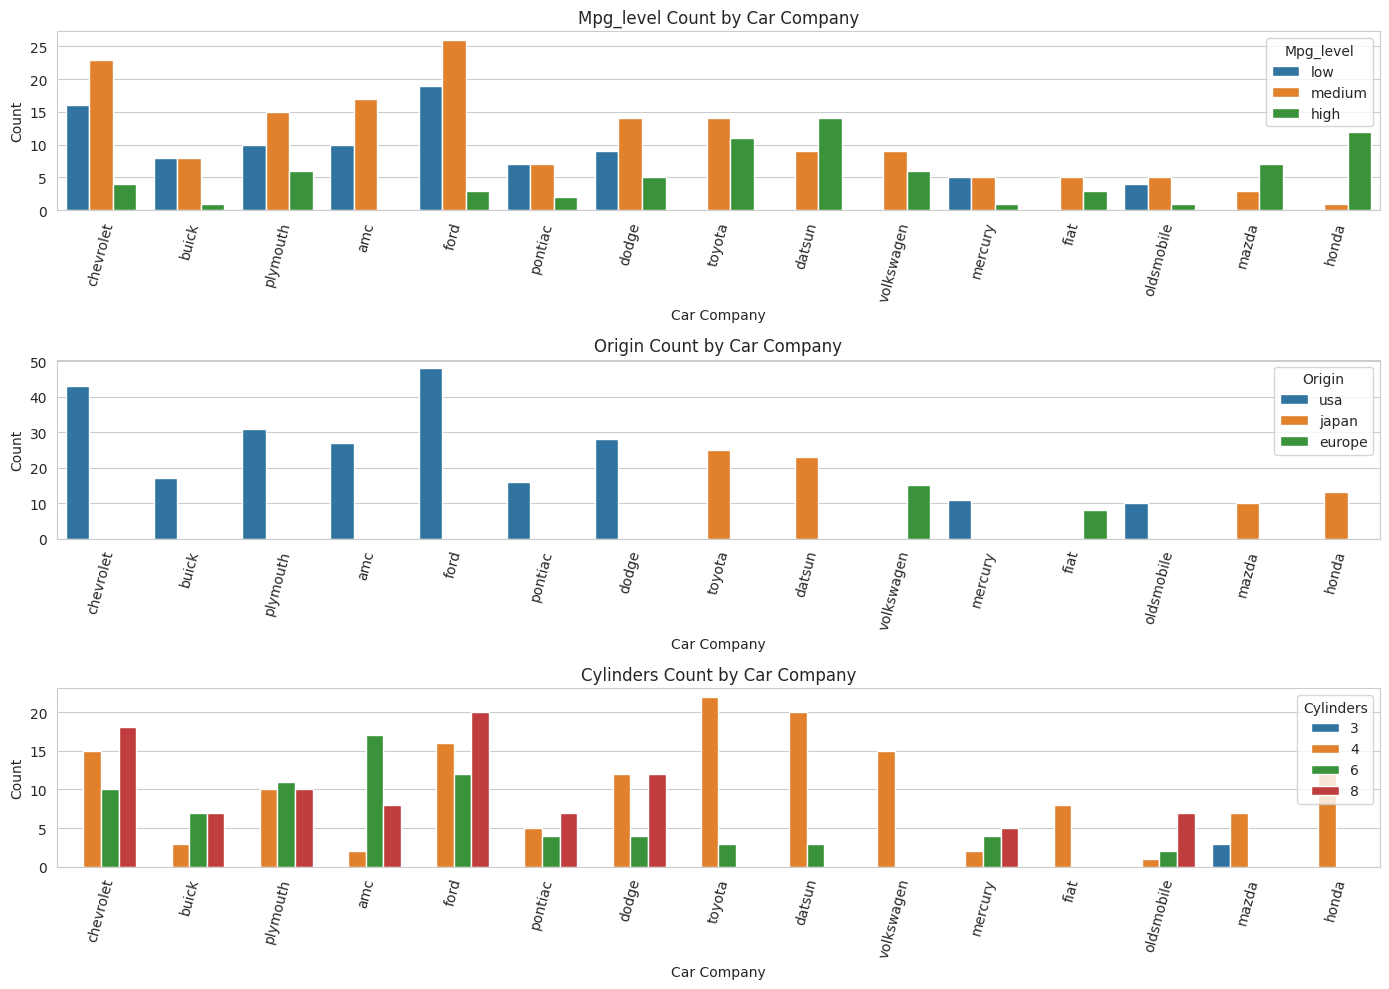

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))

for i, cat in enumerate(['mpg_level', 'origin', 'cylinders']):
    ax = axes[i]
    sns.countplot(x='car_company', hue=cat, data=df_cat_top_comp, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    ax.set_xlabel('Car Company')
    ax.set_ylabel('Count')
    ax.set_title(f'{cat.capitalize()} Count by Car Company')
    ax.legend(title=cat.capitalize(), loc='upper right')

plt.tight_layout()


# **1.4 feature reduction:**

We have completed the analysis of categorical attributes and discovered numerous intriguing findings, resolving many previously unanswered questions. The next step is to incorporate the necessary changes made to df_cat into the main dataframe df.

All attributes, except for car name "model", were included in our analysis and deemed useful. As a result, we will not include "model" in our dataframe since it is irrelevant.

In [ ]:
df_cat.head(1)

,origin,cylinders,model_year,mpg_level,car_company,model
0,usa,8,70,medium,chevrolet,chevelle malibu


In [ ]:
df = pd.concat((df_cat.drop("model", axis=1), df.loc[:, 'mpg':'acceleration']), axis=1)
df.head(1)

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0


In [ ]:
# save changes
df.to_csv("df_new2.csv", index=False)

# **Section 2: Numerical Variables Analysis**

In [ ]:
df = pd.read_csv("df_new2.csv")
df.head(1)

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0


In [ ]:
print("The numerical variables in the dataset are:")
for num in nums:
    print("- " + num)


The numerical variables in the dataset are:
- mpg
- displacement
- horsepower
- weight
- acceleration


In [ ]:
cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_num = df[cols].copy()
df_num.head(1)

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.4 KB


In [ ]:
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8


Next, we examine the distribution of each numerical attribute and derive insights from the resulting plots. Ideally, numerical variables follow a Gaussian distribution, which has a bell-shaped curve. Here's an example of what a Gaussian distribution plot may look like:

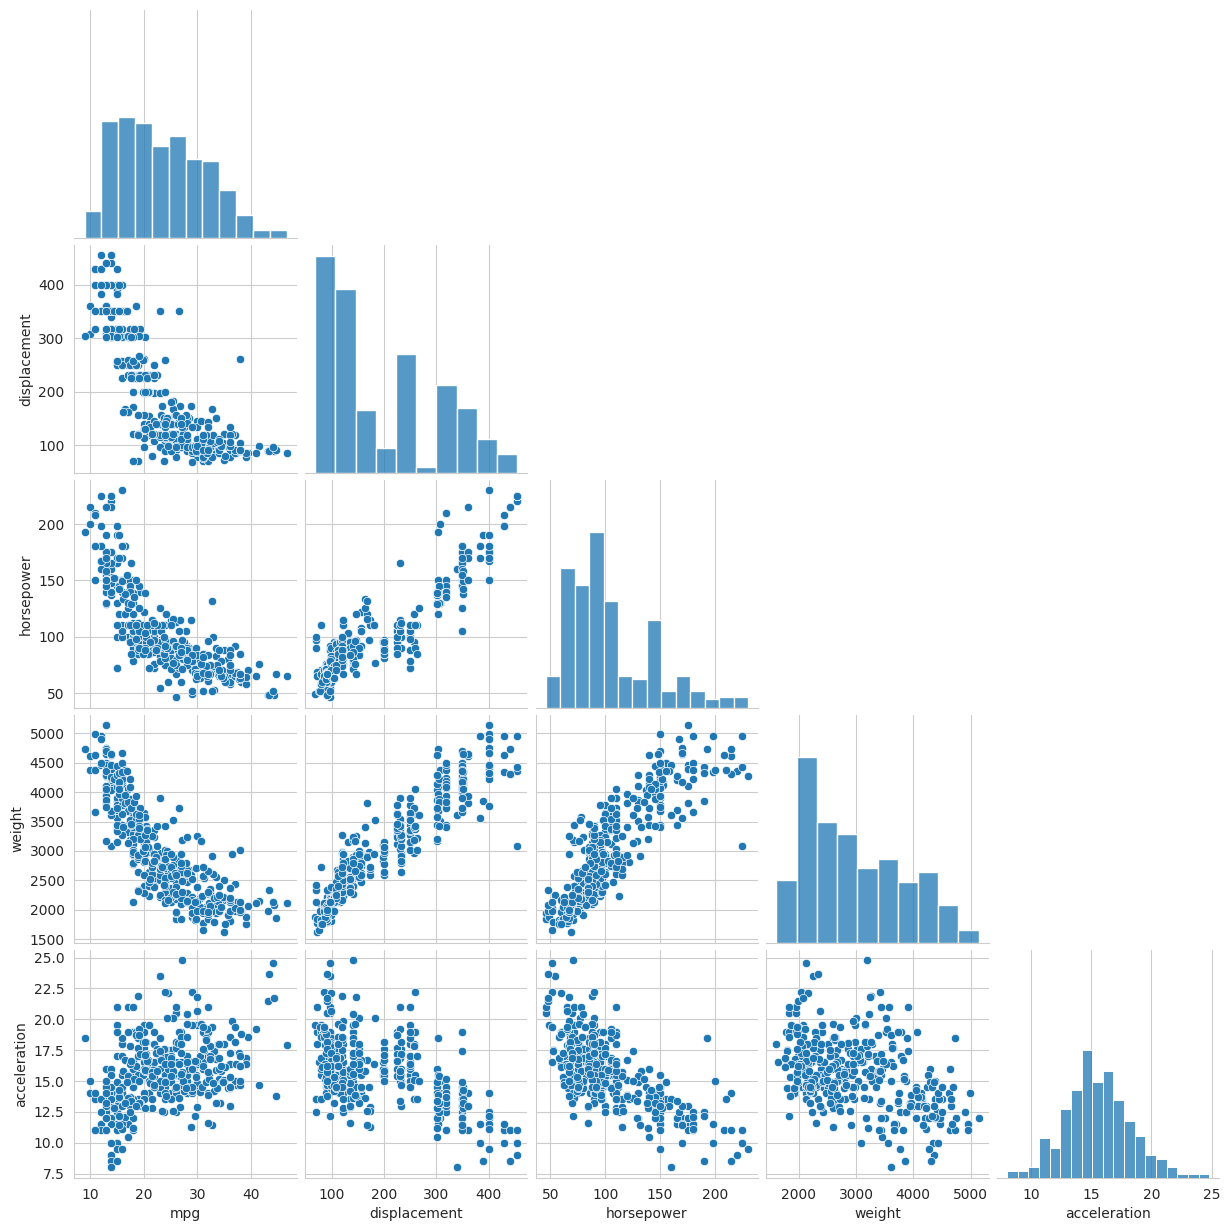

In [ ]:
# Create pairplot for numerical variables
sns.pairplot(data=df_num, diag_kind='hist', corner=True)
plt.show()


Upon inspecting the distribution plots, we observe that acceleration appears to follow a Gaussian distribution, with a few outliers lying outside the whiskers. On the other hand, the distributions of mpg and weight exhibit a right-skewed Gaussian shape. However, the distributions of displacement and horsepower appear to be significantly far from a Gaussian distribution.

It is important to note that our analysis is based solely on visual examination of the distribution plots. In the next phase of our analysis (statistical analysis), we will perform hypothesis testing to confirm the normality of these distributions.

# **2.1 Outliers Analysis**

Tukey's method for outliers is a statistical technique for identifying outliers in a dataset based on the interquartile range (IQR). The IQR is defined as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. According to Tukey's method, any data point that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR is considered an outlier. These outliers are sometimes referred to as "Tukey outliers".

In [ ]:
def t_outliers(x):
    """
    Identify outliers using Tukey's method.

    Parameters:
        x (pandas.Series): A pandas Series containing the data

    Returns:
        pandas.Series: A pandas Series containing the outlier values
    """
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)

    iqr = q3 - q1

    min_range = q1 - iqr * 1.5
    max_range = q3 + iqr * 1.5

    outliers = x[(x < min_range) | (x > max_range)]
    return outliers


Acceleration and horsepower are the only attributes that exhibit Tukey outliers, which is also evident from the boxplots shown above.

In [ ]:
for col in nums:
  outliers = t_outliers(df_num[col])
  if len(outliers) > 0:
    print(f"{col} has the following Tukey outliers:")
    print(outliers)
    print("\n")
  else:
    print(f"{col} does not have any Tukey outliers.\n")


mpg does not have any Tukey outliers.

displacement does not have any Tukey outliers.

horsepower has the following Tukey outliers:
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
66     208.0
93     215.0
94     225.0
115    230.0
Name: horsepower, dtype: float64


weight does not have any Tukey outliers.

acceleration has the following Tukey outliers:
7       8.5
9       8.5
11      8.0
58     23.5
193    22.2
194    22.1
207    21.9
297    24.8
298    22.2
324    23.7
388    24.6
Name: acceleration, dtype: float64




The below code is extracting the rows from the df where the feature has Tukey outliers.

In [ ]:
horsepower_outliers = df.loc[list(t_outliers(df_num.horsepower).index)]
horsepower_outliers

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
6,usa,8,70,low,chevrolet,14.0,454.0,220.0,4354,9.0
7,usa,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
8,usa,8,70,low,pontiac,14.0,455.0,225.0,4425,10.0
13,usa,8,70,low,buick,14.0,455.0,225.0,3086,10.0
25,usa,8,70,low,ford,10.0,360.0,215.0,4615,14.0
27,usa,8,70,low,dodge,11.0,318.0,210.0,4382,13.5
66,usa,8,72,low,mercury,11.0,429.0,208.0,4633,11.0
93,usa,8,73,low,chrysler,13.0,440.0,215.0,4735,11.0
94,usa,8,73,low,buick,12.0,455.0,225.0,4951,11.0
115,usa,8,73,low,pontiac,16.0,400.0,230.0,4278,9.5


There appears to be a common pattern among the outliers in horsepower, indicating that they are not random. Specifically:

    All of the outliers are vehicles from the USA, which may be due to the fact that the majority of the vehicles in the dataset are from the USA.
    All of the outliers have 8 cylinders.
    All of the outliers have a low mpg level.
    All of the outliers have a weight in the range of 4000.
    Most of the outliers have a displacement in the range of 400.
    Most of the outliers were manufactured in the early years (before 1974).

These observations suggest that there may be some underlying factors that are causing these outliers in horsepower. Further analysis is needed to investigate these factors and their impact on the data.

In [ ]:
# extract rows where acceleration has Tukey outliers
acceleration_outliers = df.loc[list(t_outliers(df_num.acceleration).index)]
acceleration_outliers

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
7,usa,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
9,usa,8,70,low,amc,15.0,390.0,190.0,3850,8.5
11,usa,8,70,low,plymouth,14.0,340.0,160.0,3609,8.0
58,europe,4,72,medium,volkswagen,23.0,97.0,54.0,2254,23.5
193,usa,4,76,medium,chevrolet,29.0,85.0,52.0,2035,22.2
194,usa,4,76,medium,chevrolet,24.5,98.0,60.0,2164,22.1
207,europe,4,76,medium,peugeot,19.0,120.0,88.0,3270,21.9
297,europe,4,79,medium,peugeot,27.2,141.0,71.0,3190,24.8
298,usa,8,79,medium,oldsmobile,23.9,260.0,90.0,3420,22.2
324,europe,4,80,high,vw,43.4,90.0,48.0,2335,23.7


The outliers in acceleration do not appear to follow a particular pattern and seem to be random. However, one observation that can be made is that none of these outliers are associated with Japanese cars.

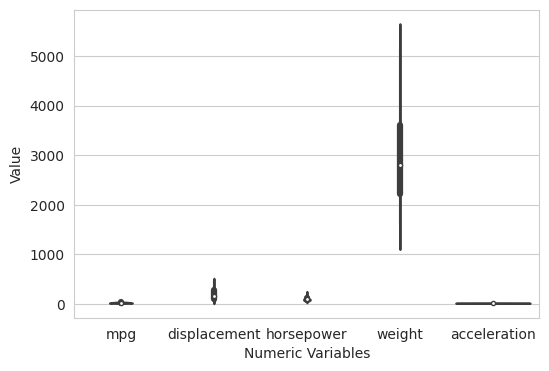

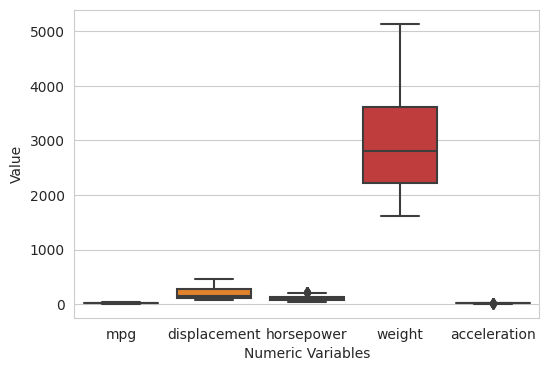

In [ ]:
# visualize distribution of numeric variables
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x="variable", y="value", data=pd.melt(df_num), ax=ax)
ax.set_xlabel('Numeric Variables')
ax.set_ylabel('Value')
plt.show()

# visualize distribution of numeric variables
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_num), ax=ax)
ax.set_xlabel('Numeric Variables')
ax.set_ylabel('Value')
plt.show()


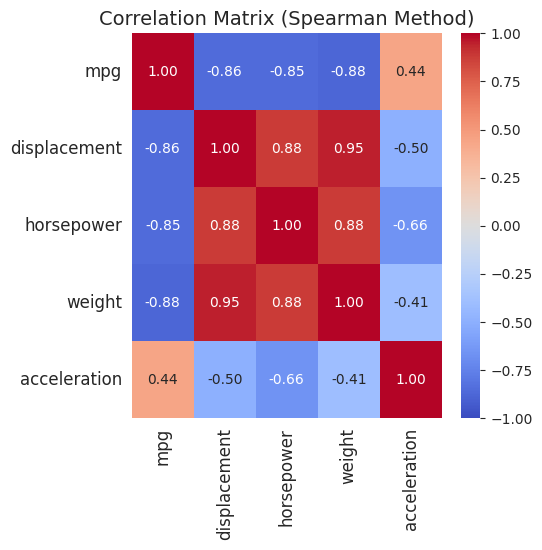

In [ ]:
# Plot correlation matrix using spearman method
corr = df_num.corr(method='spearman')
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlation Matrix (Spearman Method)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


The analysis reveals that there are correlations between different numerical attributes. When the MPG increases, there is a decrease in the values of displacement, horsepower, and weight; while acceleration increases. Similarly, when horsepower increases, displacement and weight also increase, but acceleration decreases. When weight increases, displacement also tends to increase, but acceleration decreases. Finally, when acceleration increases, there is a decrease in displacement. Therefore, all the numerical attributes are interrelated.

In [ ]:
df.corr()

<ipython-input-111-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
cylinders,1.000000,-0.345647,-0.777618,0.950823,0.842983,0.897527,-0.504683
model_year,-0.345647,1.000000,0.580541,-0.369855,-0.416361,-0.309120,0.290316
mpg,-0.777618,0.580541,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,0.950823,-0.369855,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,0.842983,-0.416361,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,0.897527,-0.309120,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.504683,0.290316,0.423329,-0.543800,-0.689196,-0.416839,1.000000


This plot(below) examines the relationship between horsepower and acceleration, while also segmenting the data by origin, mpg_level, and cylinders. All these factors are visualized together in a single plot for better comparison and analysis.

We observe a negative correlation between horsepower and acceleration across all regions. Additionally, we notice that cars with low fuel efficiency have lower acceleration and higher horsepower. Similarly, vehicles with a higher number of cylinders tend to have lower acceleration and higher horsepower.

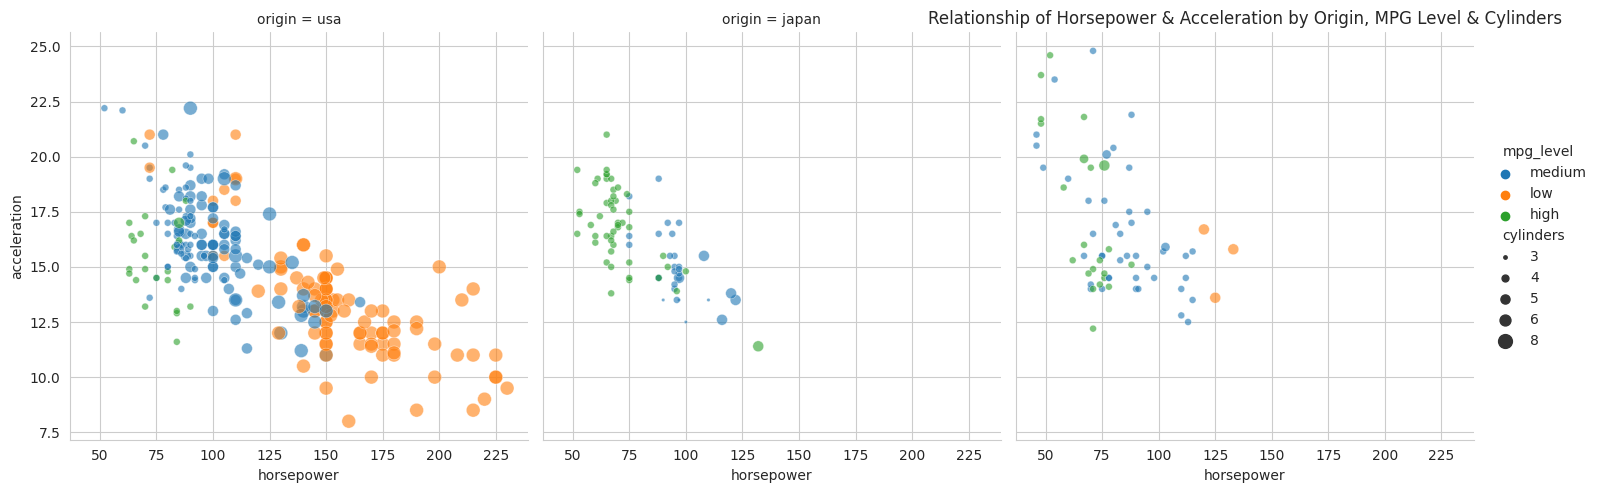

In [ ]:
sns.relplot(x='horsepower', y='acceleration', hue='mpg_level',
            size='cylinders', col='origin', data=df, kind='scatter', sizes=(6, 99), alpha=0.6)
plt.title('Relationship of Horsepower & Acceleration by Origin, MPG Level & Cylinders')
plt.show()


In this plot(below), we examine the correlation between weight and horsepower, categorized by origin, mpg_level, and cylinders, presented in a single graph.

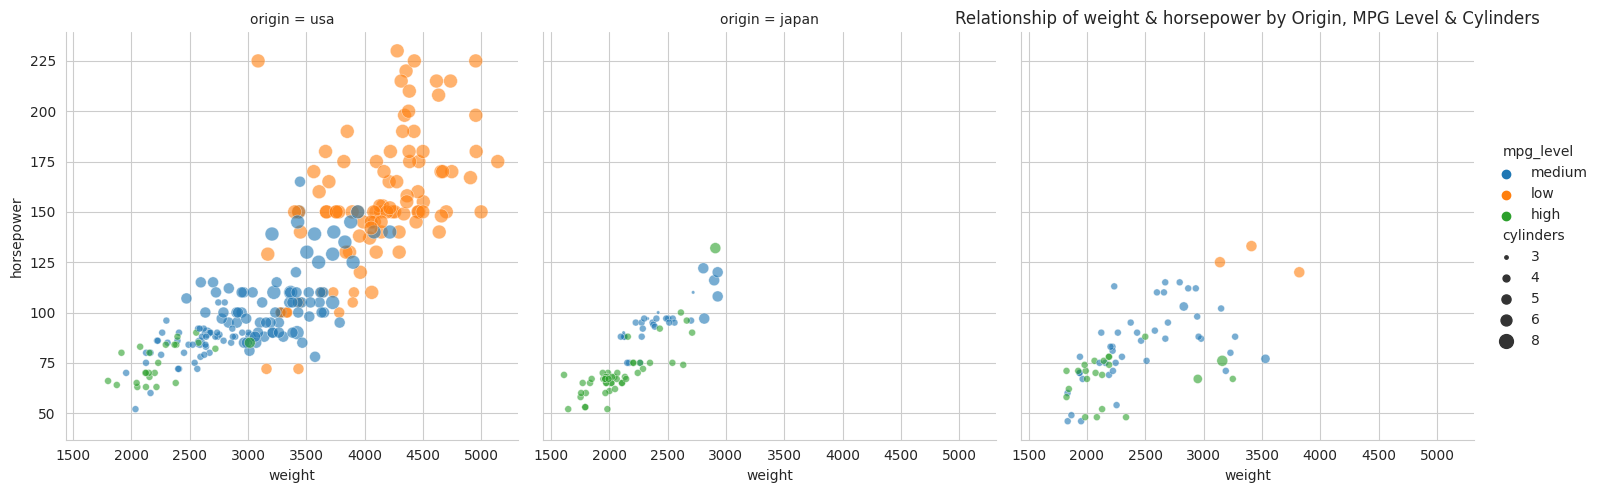

In [ ]:
sns.relplot(x='weight', y='horsepower', hue='mpg_level',
            size='cylinders', col='origin', data=df, kind='scatter', sizes=(6, 99), alpha=0.6)
plt.title('Relationship of weight & horsepower by Origin, MPG Level & Cylinders')
plt.show()


We did not discover any new insights here.

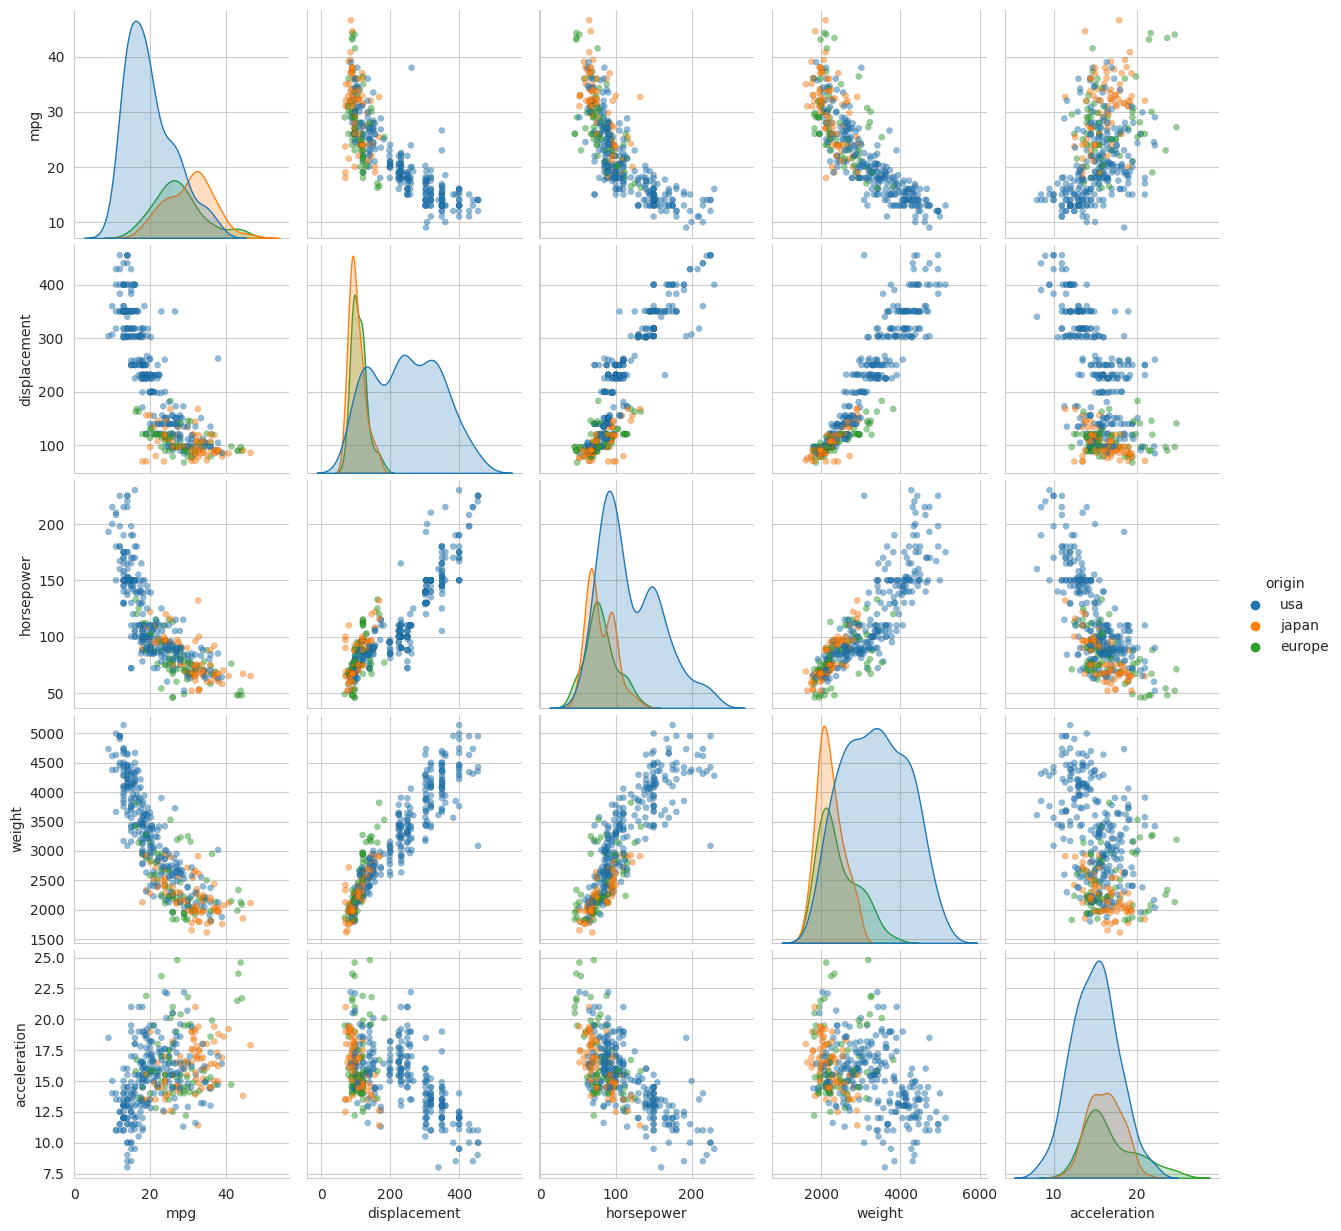

In [ ]:
sns.pairplot(data=df, vars=nums, diag_kind='kde', hue='origin',
             plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5),
             diag_kws=dict(fill=True))
plt.show()

# **Section 3: "Exploring the Relationship Between Numerical and Categorical Attributes"**

Below plot:

We have already observed in our analysis on categorical data that there is an increase in mpg across all origins as the year progresses.

As the year progresses, there is a slight decrease in displacement, horsepower, and weight of vehicles belonging to the USA, but there is no significant change in Japan and Europe.

It is noticeable that in the 1980s, all vehicles have a similar displacement because unlike the 1970s, the distribution is not spread out, and the distribution is short and wide instead of tall and skinny.
    
Throughout the years, acceleration remains relatively the same across all regions.



Variation of numerical features with respect to model year


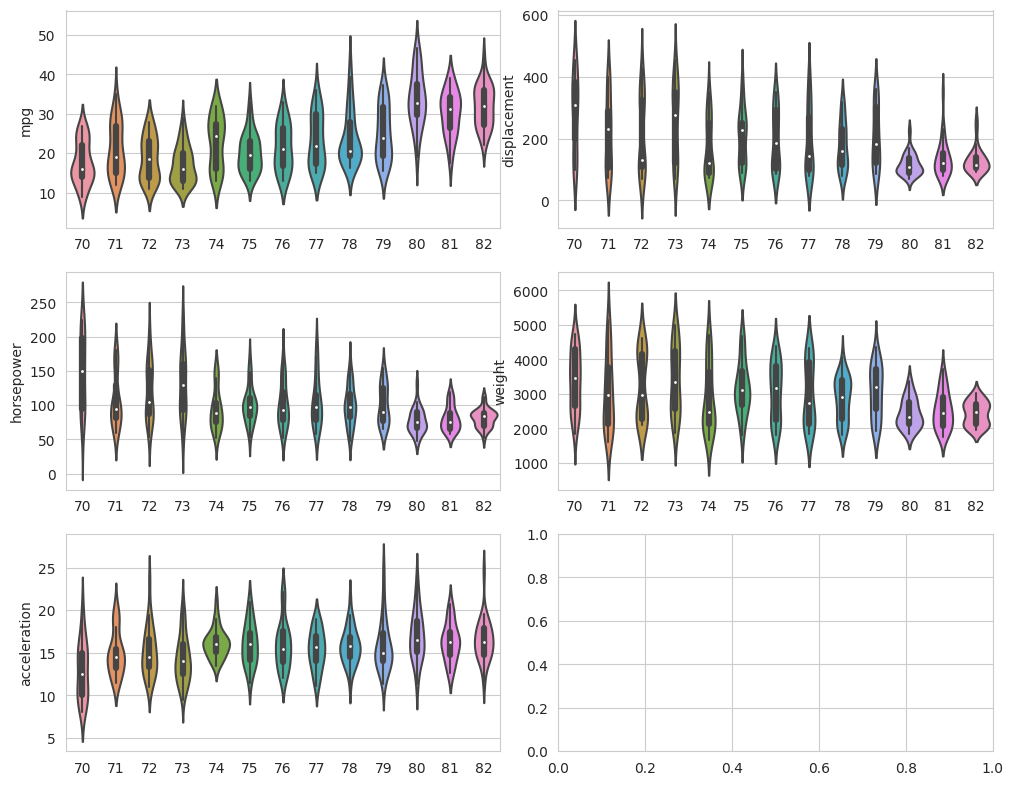

In [ ]:
print('Variation of numerical features with respect to model year')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.tight_layout()

for idx, col in enumerate(nums):
    row, col_idx = idx // 2, idx % 2
    ax = axes[row, col_idx]
    sns.violinplot(x='model_year', y=col, data=df, ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(col)

plt.show()


Below plot: We can observe some trends in how the numerical features vary with respect to the mpg_level category:

    On average, as mpg_level increases, the displacement tends to decrease.
    Similarly, as mpg_level increases, the horsepower tends to decrease.
    Likewise, as mpg_level increases, the weight tends to decrease.
    Vehicles with a low mpg_level typically have less acceleration compared to vehicles with higher mpg_level.
    However, vehicles with medium and high mpg_level tend to have similar acceleration levels.

variation of numerical features with mpg_level


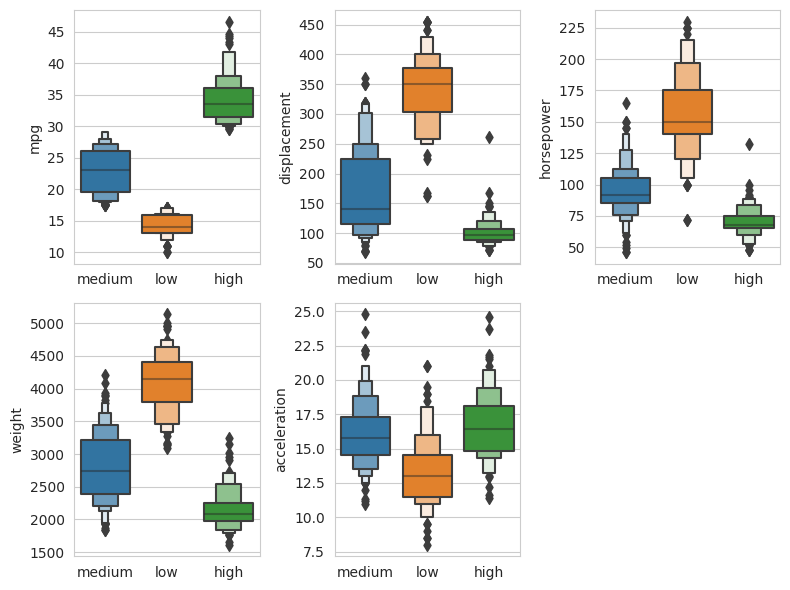

In [ ]:
print('variation of numerical features with mpg_level')

fig = plt.figure(1, (8, 6))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='mpg_level', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

Below plot: On average, vehicles from the USA have lower miles per gallon compared to those from Japan and Europe. Additionally, vehicles from the USA tend to have higher displacement, horsepower, and weight compared to those from Japan and Europe. Although all vehicles have similar acceleration regardless of their origin, the distribution of acceleration for the USA is more spread out due to its larger representation in the dataset compared to the other origins.

Variation of numerical features with origin


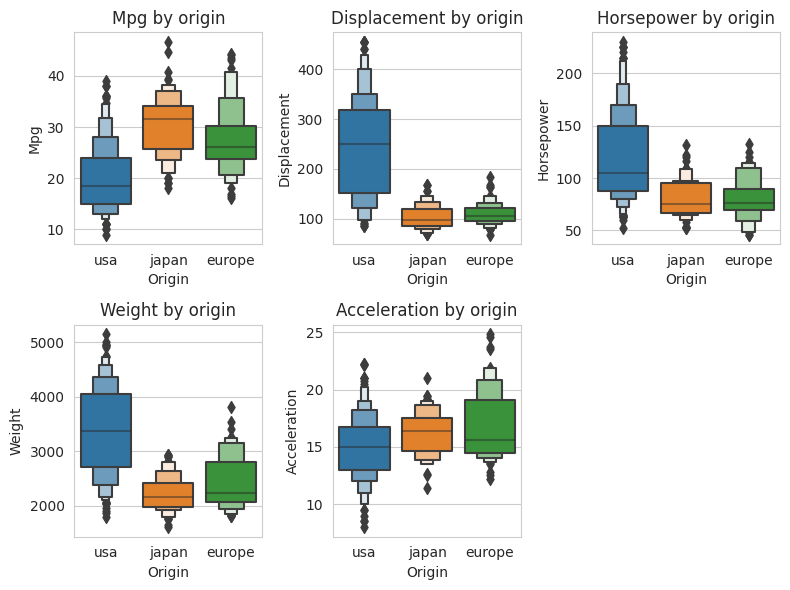

In [ ]:
# Visualize variation of numerical features with origin
print('Variation of numerical features with origin')

# Create a figure with appropriate size
fig = plt.figure(figsize=(8, 6))

# Loop through each numerical feature and create a boxenplot
for i, feature in enumerate(nums):
    ax = plt.subplot(2, 3, i+1)
    sns.boxenplot(x='origin', y=feature, data=df)
    ax.set_xlabel('Origin')
    ax.set_ylabel(feature.capitalize())
    ax.set_title(f'{feature.capitalize()} by origin')
    plt.tight_layout()


Below plot: We observed the following trends in the variation of numerical features with respect to the number of cylinders:

    MPG increases as the number of cylinders goes from 3 to 4, but starts decreasing as the number of cylinders further increases.
    Displacement shows a polynomial increase with increasing cylinders.
    Horsepower decreases as the number of cylinders goes from 3 to 5, but starts increasing as the number of cylinders further increases.
    Vehicle weight increases on average with increasing cylinders, which is an expected observation.
    Acceleration increases as the number of cylinders goes from 3 to 5, but starts decreasing as the number of cylinders further increases.
    This could be due to the fact that vehicles with more cylinders tend to be heavier and hence have less acceleration.

Variation of numerical features with respect to cylinders


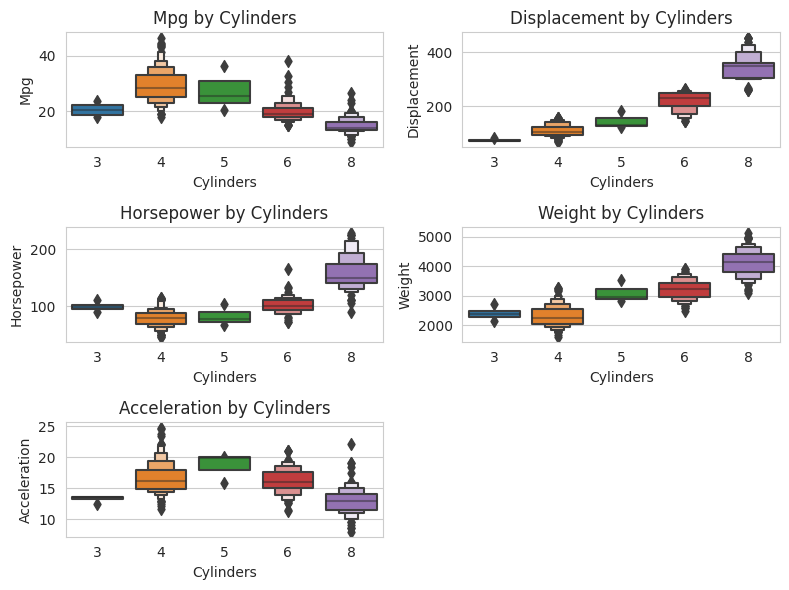

In [ ]:
print('Variation of numerical features with respect to cylinders')

fig = plt.figure(figsize=(8, 6))

for idx, col in enumerate(nums):
    ax = fig.add_subplot(3, 2, idx+1)
    sns.boxenplot(x='cylinders', y=col, data=df)
    ax.set_xlabel('Cylinders')
    ax.set_ylabel(col.capitalize())
    ax.set_title(f'{col.capitalize()} by Cylinders')
    plt.tight_layout()
